In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style='darkgrid')

In [ ]:
t_data = sns.load_dataset(r"titanic")

print(t_data.head())

Here is a scatterplot between Age and Fare 

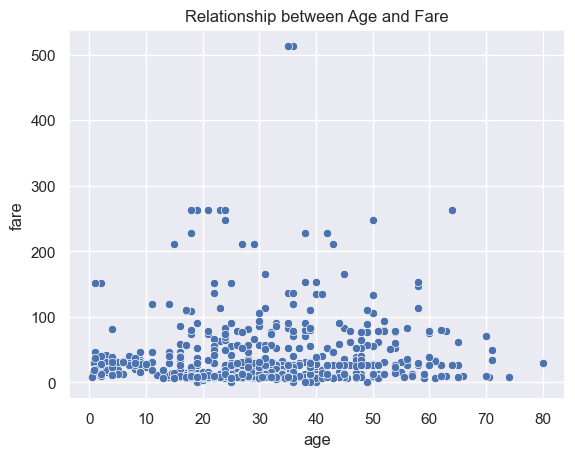

In [15]:
sns.scatterplot(x="age", y="fare", data=t_data)

plt.title("Relationship between Age and Fare")

Here is the survival rate for different age group.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '(0, 5]'),
  Text(1, 0, '(5, 10]'),
  Text(2, 0, '(10, 15]'),
  Text(3, 0, '(15, 20]'),
  Text(4, 0, '(20, 25]'),
  Text(5, 0, '(25, 30]'),
  Text(6, 0, '(30, 35]'),
  Text(7, 0, '(35, 40]'),
  Text(8, 0, '(40, 45]'),
  Text(9, 0, '(45, 50]'),
  Text(10, 0, '(50, 55]'),
  Text(11, 0, '(55, 60]'),
  Text(12, 0, '(60, 65]'),
  Text(13, 0, '(65, 70]'),
  Text(14, 0, '(70, 75]'),
  Text(15, 0, '(75, 80]')])

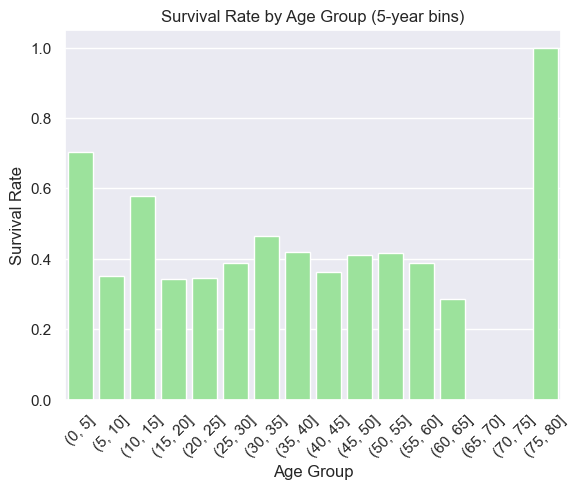

In [19]:
t_data["age_group"] = pd.cut(t_data["age"], bins=range(0, 85, 5))
age_summary = t_data.groupby("age_group", observed=False).agg(
    Total=("survived", "count"),
    Survived=("survived", "sum")
).reset_index()

age_summary["Survival_Rate"] = age_summary["Survived"] / age_summary["Total"]

sns.barplot(data=age_summary, x="age_group", y="Survival_Rate", color="lightgreen")
plt.title("Survival Rate by Age Group (5-year bins)")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)

Here is a plot for the average fare paid byh different age groups.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '(0, 5]'),
  Text(1, 0, '(5, 10]'),
  Text(2, 0, '(10, 15]'),
  Text(3, 0, '(15, 20]'),
  Text(4, 0, '(20, 25]'),
  Text(5, 0, '(25, 30]'),
  Text(6, 0, '(30, 35]'),
  Text(7, 0, '(35, 40]'),
  Text(8, 0, '(40, 45]'),
  Text(9, 0, '(45, 50]'),
  Text(10, 0, '(50, 55]'),
  Text(11, 0, '(55, 60]'),
  Text(12, 0, '(60, 65]'),
  Text(13, 0, '(65, 70]'),
  Text(14, 0, '(70, 75]'),
  Text(15, 0, '(75, 80]')])

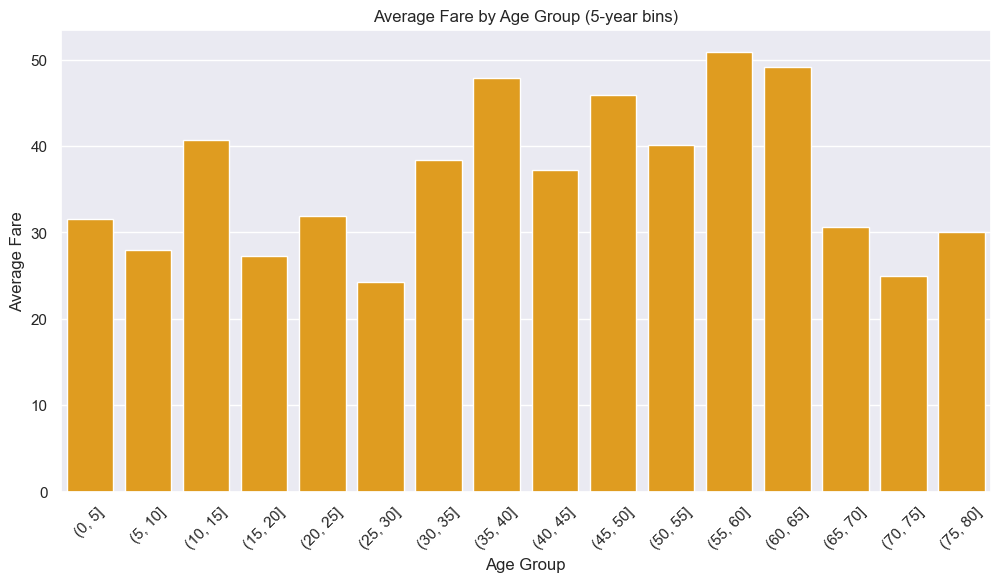

In [23]:
avg_fare = t_data.groupby("age_group", observed = False)["fare"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_fare, x="age_group", y="fare", color="orange")
plt.title("Average Fare by Age Group (5-year bins)")
plt.xlabel("Age Group")
plt.ylabel("Average Fare")
plt.xticks(rotation=45)

Here is the survival rate for the groups farewise. One thing to note in here is that the data for fare above 180 is scarse and one can
drop the data above 180.

    Clearly one can see an increasing survival rate as we go along higher fare groups. Which tell that at the time of rescue, the once who 
paid higher fare were preffered over thoes who paid lesser fare.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '(0, 30]'),
  Text(1, 0, '(30, 60]'),
  Text(2, 0, '(60, 90]'),
  Text(3, 0, '(90, 120]'),
  Text(4, 0, '(120, 150]'),
  Text(5, 0, '(150, 180]'),
  Text(6, 0, '(180, 210]'),
  Text(7, 0, '(210, 240]'),
  Text(8, 0, '(240, 270]')])

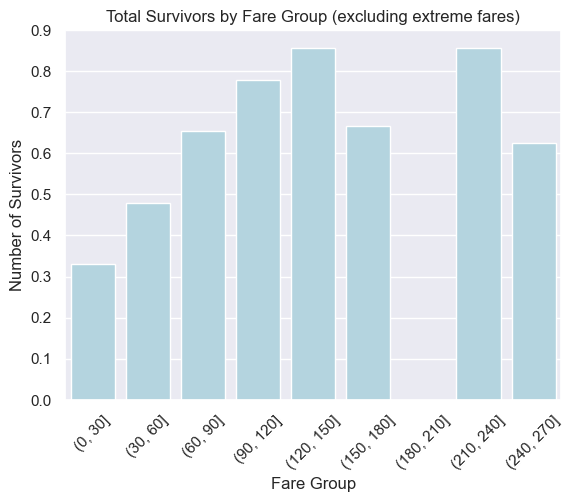

In [31]:
t_data_2 = t_data[t_data["fare"] < 300]

t_data_2 = t_data_2.copy() 
t_data_2["fare_group"] = pd.cut(t_data_2["fare"], bins=range(0, 300, 30))

fare_summary = t_data_2.groupby("fare_group", observed = False).agg(
    Total=("survived", "count"),
    Survived=("survived", "sum")
).reset_index()

fare_summary["Survival_Rate"] = fare_summary["Survived"] / fare_summary["Total"]

sns.barplot(data=fare_summary, x="fare_group", y="Survival_Rate", color="lightblue")
plt.title("Total Survivors by Fare Group (excluding extreme fares)")
plt.xlabel("Fare Group")
plt.ylabel("Number of Survivors")
plt.xticks(rotation=45)

Here's a correlation map between Age, Fare and Survival.

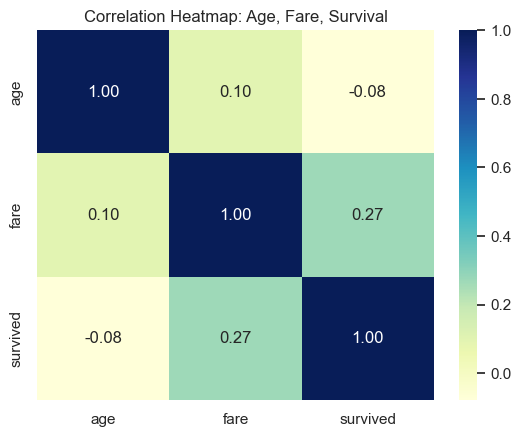

In [16]:
corr_data = t_data[["age", "fare", "survived"]].dropna()

corr_matrix = corr_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Age, Fare, Survival")